# Sprint5課題 機械学習スクラッチSVM

In [1]:
#まずはイメージを掴む

In [13]:
import numpy as np
N = 30
d = 2
#n_samples = 30, n_features = 2
A = np.random.randn(N, d)
A

array([[ 1.17031111, -0.57435281],
       [-1.12379554, -1.46496956],
       [-0.65667949,  0.56329432],
       [ 0.96500087, -0.12277309],
       [ 0.85112604,  0.47584112],
       [ 0.22709178, -0.54619055],
       [-1.71924461, -0.90054428],
       [ 0.7927661 , -0.41363065],
       [-1.203567  , -1.81207068],
       [ 0.53172711,  0.88562044],
       [ 0.51432298, -1.74511912],
       [-0.14259204, -0.28572303],
       [-0.50996478,  0.04659651],
       [ 0.18642333, -0.25271858],
       [-0.58146426, -0.45788768],
       [-0.3806601 ,  1.71457793],
       [-0.1256599 ,  0.37925133],
       [-1.43581704, -0.28836323],
       [ 0.09979061, -0.56939358],
       [-1.5051437 ,  0.32753439],
       [-0.32830484, -1.36671634],
       [-0.85299367,  0.44458111],
       [-0.58289835, -0.10599118],
       [ 1.22043229, -0.6495748 ],
       [-0.09859256, -0.11976866],
       [ 0.00449538,  1.07387534],
       [ 0.38410646,  0.70133573],
       [-0.49930251, -0.97571441],
       [-1.988055  ,

In [14]:
def f(x, y):
    return x - y

In [15]:
b= np.array([1 if f(x, y) > 0 else - 1 for x, y in A])
b

array([ 1,  1, -1,  1,  1,  1, -1,  1,  1, -1,  1,  1, -1,  1, -1, -1, -1,
       -1,  1, -1,  1, -1, -1,  1,  1, -1, -1,  1, -1, -1])

In [16]:
#Lagrange coefficient
lmbd = np.zeros(N)
lmbd

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [17]:
def kernel(X_i, X_j):
    X_i = X_i.reshape(1, -1)
    X_j = X_j.reshape(1, -1)
    return np.dot(X_i, X_j.T)

In [18]:
#lambdaの更新

lr = 10**(-5)
n_samples = len(A)

for i in range(500):
    #sgm = 0.0
    for s in range(n_samples):
        sgm = 0.0
        for t in range(n_samples):
            #sgm += (lmbd[t]*b[s]*b[t]*kernel(A[s, :], A[t, :]) + lmbd[s]*b[s]*b[t])
            sgm += (lmbd[t]*b[s]*b[t]*kernel(A[s, :], A[t, :]) )
        lmbd[s] = lmbd[s] + lr*(1-sgm)
lmbd

array([0.00471487, 0.00490341, 0.00479568, 0.00482929, 0.00495677,
       0.00486473, 0.00490144, 0.00480213, 0.00485198, 0.00491886,
       0.00459999, 0.00496934, 0.00491306, 0.00492484, 0.0049949 ,
       0.00462597, 0.00491086, 0.00483232, 0.00487982, 0.00470815,
       0.00479886, 0.00478684, 0.0049298 , 0.00469244, 0.00499312,
       0.00480282, 0.00492989, 0.00489702, 0.00478166, 0.00474561])

In [19]:
"""
#thetaの算出
theta = np.dot((lmbd*y).T, X)
theta
"""

#lmbd > 0となるサンプルのみTrueに
#サポートベクター
index = lmbd > 0
#thetaの算出
theta = np.dot((lmbd[index]*b[index]), A[index, :])
theta

array([ 0.06057892, -0.07250962])

In [20]:
#theta_0の算出
theta_0 = (b[index] - np.dot(theta, A[index].T)).sum()/index.sum()
theta_0

0.0012935663516069748

(300,)


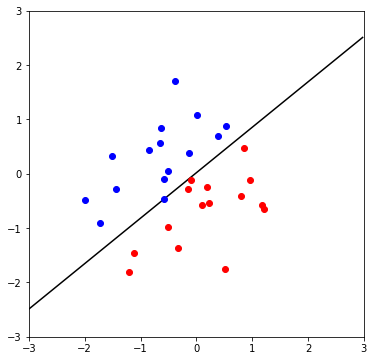

In [21]:
import matplotlib.pyplot as plt

seq =np.arange(-3, 3, 0.02)
print(seq.shape)
plt.figure(figsize = (6, 6))
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.plot(seq, -(theta[0] * seq + theta_0)/theta[1] , 'k-')
plt.plot(A[b ==  1,0], A[b ==  1,1], 'ro')
plt.plot(A[b == -1,0], A[b == -1,1], 'bo')

## 【問題1】SVM分類器のクラスを作成する
SVM分類器のクラスを作成し、Sprint0で作成した分類のパイプラインに組み込んでください。

クラスの基本構造はSprint3の線形回帰を参考にし、名前はScratchSVMClassifierとしてください。

メソッドやパラメータなどはscikit-learnを参考にしてください。

sklearn.svm.SVC — scikit-learn 0.20.2 documentation

検証段階ではJupyter Notebook上で書いていき、最終的にはpyファイルにモジュールとしてまとめてください。

scikit-learnにおけるパラメータについて

scikit-learnの実装はソフトマージンSVMになっています。ハードマージンSVMを再現するには、パラメータCをC=1e10のように非常に大きな値を設定します。（無限大に向けてCを大きくするほどハードマージンSVMに近づきます）

また、線形カーネルをscikit-learnで使う場合はkernel="linear"と指定します。デフォルトではkernel="rbf"になっており、多項式カーネルと呼ばれるものになっています。

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

class ScratchSVMClassifier_linear():
        """
        Support Vector Machineのスクラッチ実装

        Parameters
        -------------
        num_iter: int
            反復数
        lr: float
            Learning rate

        Attributes
        -------------
        coef_: ndarray, shape = [n_features, ]
        cost: ndarray, shape = [self._iter, ]
        lmbd: ndarray, shape = [n_samples, ]
            ラグランジュ乗数
        """
        def __init__(self, num_iter=500, lr = 10**(-5), lmbd_threshold = 10**(-4), no_bias = False):
                self.iter = num_iter
                self.lr = lr
                #no_bias = Trueの時はintercept = 0（切片考慮無し）に、それ以外は1に
                self.intercept = 0 if no_bias else 1
                # 目的関数を記録する配列を用意
                self.cost = np.zeros(self.iter)
                self.lmbd_threshold = lmbd_threshold
                #以下、fit時に初期化するものをとりあえず空で初期化

                #サンプル数を保管
                self.n_samples = None
                #ラグランジュ乗数
                self.lmbd = None
                #support vector参照用にtrainデータをインスタンスに保管する
                self._train_X = None
                self._train_y = None
                #support vectorのインデックス
                self.sv_idx = None
                #係数
                self.coef_  = None
                self.coef_0 = None

                #yの重複無しの要素を格納
                self.unique_value = None
                
        def fit(self, X, y, X_val=None, y_val=None):
                """
               SVMで学習する。検証用データが入力された場合はそれに対する損失と精度もイテレーションごとに計算する。

                Parameters
                ----------
                X : 次の形のndarray, shape (n_samples, n_features)
                    学習用データの特徴量
                y : 次の形のndarray, shape (n_samples, )
                    学習用データの正解値
                X_val : 次の形のndarray, shape (n_samples, n_features)
                    検証用データの特徴量
                y_val : 次の形のndarray, shape (n_samples, )
                    検証用データの正解値
                """
                #X, yをnpのarrayにしておく
                X = np.array(X)
                y = np.array(y)

                #train dataをfit後にも参照できるように保管しておく
                self._train_X = np.copy(X)
                self._train_y = np.copy(y)
                
                #サンプル方向を縦に
                y = y.reshape(-1, 1)

                #-1, 1以外の２値で入力された場合への対応（例：a, bを-1, 1に変換）

                #yの中のユニークな値を重複無しのndarrayに（[a, b, a, a, b, b] を[a, b]に ）
                self.unique_value = np.unique(y)
                #yを0, 1に変換
                #（[a, b, a, a, b, b] がaとなる場合に0(False), bとなる場合に1(True)に ）
                y = (y != self.unique_value[0]).astype(np.int64) 
                #yを-1, 1に変換
                y = (1-(-1))*y - 1 

                #サンプル数をインスタンス変数に保管
                self.n_samples = len(X)
                #サンプル数分のラグランジュ乗数をゼロで初期化
                self.lmbd = np.zeros(self.n_samples).reshape(-1, 1)

                #lmbdを算出
                self._update_lmbd(X, y)

                #lmbdを元にしてtheta(coef_)を算出
                self._gradient_descent(X, y)

        def predict(self, X_test):
                X_test = np.array(X_test)

                pred = np.dot(self.coef_, X_test.T) + self.coef_0
                #0より大きければ1, 小さければ0に変換
                pred = (pred > 0).astype(np.int64)
                #0ならa, 1ならbに変換
                pred = self.unique_value[pred]
                return pred

        def _update_lmbd(self, X, y):
                """
                Parameters
                -----------
                X: ndarray of shape (n_samples, n_features)
                y: ndarray of shape (n_samples, 1)

                Returns
                -----------
                none

                Note
                -----------
                update instance variable of lagrange coefficient lambda

                """
                for i in range(self.iter):
                        L_grad = np.ones(self.n_samples).reshape(-1, 1) - ((y * X) @ (X.T @ (self.lmbd * y)))
                        self.lmbd = self.lmbd + self.lr * (L_grad)

                        #iterごとのコストを保管
                        self.cost[i] = self._L(X, y)

                #return値無し
                return

        def _L(self, X, y):
                return  self.lmbd.sum() - (((self.lmbd * y).T @ X) @ (X.T @ (self.lmbd * y)))/2

        def _gradient_descent(self, X, y):
            #lambda > 0を満たしているものをサポートベクターとしてTrueでラベルしてインデックスに使用
            #サポートベクトルを絞るため、便宜上lmbd = 0.0001などにする
            self.sv_idx = (self.lmbd > self.lmbd_threshold).reshape(-1,)
            #thetaの算出
            self.coef_ = (self.lmbd[self.sv_idx] * y[self.sv_idx]).T @ X[self.sv_idx, :]
            #theta_0の算出
            self.coef_0 =  (y[self.sv_idx] - (X[self.sv_idx] @ self.coef_.T )).sum(axis=0)/(self.sv_idx).sum()
            
            #return値無し
            return

        def decision_region(self, X, y, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel',  target_names=['1', '-1']):
                """
                ２値分類を２次元の特徴量で学習したモデルの決定領域を描く
                背景の色が学習したモデルによる推定値から描画される
                散布図の点は学習用のデータである。

                Parameters
                ---------------
                X: ndarray, shape(n_samples, 2)
                    特徴量
                y: ndarray, shape(n_samples,)
                    正解値
                model: object
                    学習したモデルのインスタンスを入れる
                step: float, (default: 0.1)
                    推定値を計算する間隔を設定する
                title: str
                    グラフのタイトルの文章を与える
                xlabel, ylabel: str
                    軸ラベルの文章を与える
                target_names=: list of str
                    凡例の一覧を与える
                ---------------
                """
                #setting
                scatter_color = ['red', 'blue']
                contourf_color = ['skyblue', 'pink']
                n_class = 2


                #pred
                #各特徴量に対してメッシュを生成（a=(a1, a2, a3), b=(b1, b2, b3)に対して[[a1, b1], [a1, b2], [a1, b3]], [[a2, b1], [a2, b2], [a2, b3]], [[a3, b1], [a3, b2], [a3, b3]]を生成）
                mesh_f0, mesh_f1 = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))

                #多次元を一次元配列に
                mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
                pred = self.predict(mesh).reshape(mesh_f0.shape)

                #plot
                fig, ax = plt.subplots(1,1, figsize=(6,4 ))
                ax.set_title(title)
                ax.set_xlabel(xlabel)
                ax.set_ylabel(ylabel)
                #等高線塗りつぶし
                ax.contourf(mesh_f0, mesh_f1, pred, n_class-1, cmap=ListedColormap(contourf_color))
                #等高線塗りつぶし
                ax.contour(mesh_f0, mesh_f1, pred, n_class-1, colors='y', linewidths=3, alpha = 0.5)
                #重複しない要素に対して, 答えをプロット
                for i, target in enumerate(set(np.unique(y))):
                    ax.scatter(X[y==target][:, 0], X[y==target][:, 1], s=20, color=scatter_color[i], label=target_names[i], marker='o')

                #trainデータに関してプロットしている時には
                if (self._check_same_ary(y, self._train_y)):
                    #support vectorを黄色に
                    ax.scatter(X[self.sv_idx, 0], X[self.sv_idx, 1], s=20, color='yellow' , label='supprt vector', marker='o')

                ax.legend()


                #return値無し
                return

        def _check_same_ary(self, a, b):
                return (a == b).all() if (a.shape == b.shape) else False

        #学習曲線Plot用の関数
        def plot_learning_curve(self):
                fig, ax = plt.subplots(1,1, figsize=(4,4 ))
                ax.plot(np.array(range(self.iter)), self.cost, "-", label = 'train')

                #label
                ax.set_title('Learning Curve')
                ax.set_xlabel('n of iterations')
                ax.set_ylabel('Lagrangian')
                ax.legend()

                #return値無し
                return

## 【問題2】（アドバンス課題）多項式カーネル関数の作成
問題1では線形カーネルを使用しましたが、多項式カーネルにも切り替えられるようにしましょう。



パフォーマンスは問題3の中で問題2と合わせて比較する

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

class ScratchSVMClassifier():
        """
        Support Vector Machineのスクラッチ実装

        Parameters
        -------------
        num_iter: int
            反復数
        lr: float
            Learning rate

        Attributes
        -------------
        coef_: ndarray, shape = [n_features, ]
        cost: ndarray, shape = [self._iter, ]
        lmbd: ndarray, shape = [n_samples, ]
            ラグランジュ乗数
        """
        def __init__(self, num_iter=500, lr = 10**(-5), lmbd_threshold = 10**(-4), no_bias = False, kernel='linear', kernel_params=[1, 2, 3]):
                self.iter = num_iter
                self.lr = lr
                #no_bias = Trueの時はintercept = 0（切片考慮無し）に、それ以外は1に
                self.intercept = 0 if no_bias else 1
                # 損失を記録する配列を用意
                self.cost = np.zeros(self.iter)
                self.lmbd_threshold = lmbd_threshold
                self.kernel = kernel
                self.kernel_params = kernel_params
                
            #以下、fit時に初期化するものをとりあえず空で初期化
                #サンプル数を保管
                self.n_samples = None
                #ラグランジュ乗数
                self.lmbd = None
                #support vector参照用にtrainデータをインスタンスに保管する
                self._train_X = None
                self._train_y = None
                #support vectorのインデックス
                self.sv_idx = None
                self.coef_  = None
                self.coef_0 = None

                #yの重複無しの要素を格納
                self.unique_value = None
                
        def fit(self, X, y, X_val=None, y_val=None):
                """
               SVMで学習する。検証用データが入力された場合はそれに対する損失と精度もイテレーションごとに計算する。

                Parameters
                ----------
                X : 次の形のndarray, shape (n_samples, n_features)
                    学習用データの特徴量
                y : 次の形のndarray, shape (n_samples, )
                    学習用データの正解値
                X_val : 次の形のndarray, shape (n_samples, n_features)
                    検証用データの特徴量
                y_val : 次の形のndarray, shape (n_samples, )
                    検証用データの正解値
                """
            #X, yの整形
                #X, yをnpのarrayにしておく
                X = np.array(X)
                y = np.array(y)

                #train dataをfit後にも参照できるように保管しておく
                self._train_X = np.copy(X)
                self._train_y = np.copy(y)

                #サンプル方向を縦に
                y = y.reshape(-1, 1)

                #-1, 1以外の２値で入力された場合への対応（例：a, bを-1, 1に変換）
                #yの中のユニークな値を重複無しのndarrayに（[a, b, a, a, b, b] を[a, b]に ）
                self.unique_value = np.unique(y)
                #yを0, 1に変換
                #（[a, b, a, a, b, b] がaとなる場合に0(False), bとなる場合に1(True)に ）
                y = (y != self.unique_value[0]).astype(np.int64) 
                #yを-1, 1に変換
                y = (1-(-1))*y - 1 
                
            #インスタンス変数に必要な情報を代入
                #サンプル数をインスタンス変数に保管
                self.n_samples = len(X)
                #サンプル数分のラグランジュ乗数をゼロで初期化
                self.lmbd = np.zeros(self.n_samples).reshape(-1, 1)

            #lmbdを算出
                self._update_lmbd(X, y)

            #lmbdを元にしてtheta(coef_)を算出
                self._gradient_descent(X, y)

        def predict(self, X_test):
            #引数の整形
                X_test = np.array(X_test)
            
            #prediction
                pred = np.dot(self.coef_, X_test.T) + self.coef_0
                #0より大きければ1, 小さければ0に変換
                pred = (pred > 0).astype(np.int64)
                #0ならa, 1ならbに変換
                pred = self.unique_value[pred]
                
                return pred

        def _kernel(self, x1, x2):
                """
                Parameters
                -----------
                x1: ndarray of shape(n_features, )
                x2: ndarray of shape(n_features, )

                Returns
                -----------
                A scaler value processed with linear kernel function

                Note
                -----------
                """
                 #(n_features, )を念の為(1, n_features)に整形
                x1 = x1.reshape(1, -1)
                x2 = x2.reshape(1, -1)
                
                if (self.kernel == 'linear'):
                        return np.dot(x1, x2.T)
                #polynomial
                elif (self.kernel == 'rbf'):
                        g = self.kernel_params[0]
                        t = self.kernel_params[1]
                        d = self.kernel_params[2]
                        return (g * np.dot(x1, x2.T) + t)**(d)
                return

        def _update_lmbd(self, X, y):
                """
                Parameters
                -----------
                X: ndarray of shape (n_samples, n_features)
                y: ndarray of shape (n_samples, 1)

                Returns
                -----------
                none

                Note
                -----------
                update instance variable of lagrange coefficient lambda

                """
                for i in range(self.iter):
                        for s in range(self.n_samples):
                                #行ごとの計算を一時保管
                                sgm = 0.0
                                for t in range(self.n_samples):
                                        #任意の２行同士の要素を計算するために, s番目とt番目のサンプルでn^2のループ
                                        sgm += self.lmbd[t]*y[s]*y[t]*self._kernel(X[s, :], X[t, :]) + self.lmbd[s]*y[s]*y[t]
                                
                                #合計値と学習率を用いてlmbdを更新
                                self.lmbd[s] = self.lmbd[s] + self.lr*(1-sgm)

                        #iterごとのコストを保管
                        self.cost[i] = self._L(X, y)

                #return値無し（インスタンス変数を更新する）
                return

        def _L(self, X, y):
                return  self.lmbd.sum() - (((self.lmbd * y).T @ X) @ (X.T @ (self.lmbd * y)))/2

        def _gradient_descent(self, X, y):
                """
                Parameters
                -----------
                X: ndarray of shape (n_samples, n_features)
                y: ndarray of shape (1, n_samples)

                Returns
                -----------
                none

                Note
                -----------
                update coefficient of each features in X (theta)

                """
                #lambda > 0を満たしているものをサポートベクターとしてTrueでラベルしてインデックスに使用
                #サポートベクトルを絞るため、便宜上lmbd = 0.0001などにする
                self.sv_idx = (self.lmbd > self.lmbd_threshold).reshape(-1,)
                #thetaの算出
                self.coef_ = (self.lmbd[self.sv_idx] * y[self.sv_idx]).T @ X[self.sv_idx, :]
                #theta_0の算出
                self.coef_0 =  (y[self.sv_idx] - (X[self.sv_idx] @ self.coef_.T )).sum(axis=0)/(self.sv_idx).sum()

                return

        def decision_region(self, X, y, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel',  target_names=['1', '-1']):
                """
                ２値分類を２次元の特徴量で学習したモデルの決定領域を描く
                背景の色が学習したモデルによる推定値から描画される
                散布図の点は学習用のデータである。

                Parameters
                ---------------
                X: ndarray, shape(n_samples, 2)
                    特徴量
                y: ndarray, shape(n_samples,)
                    正解値
                model: object
                    学習したモデルのインスタンスを入れる
                step: float, (default: 0.1)
                    推定値を計算する間隔を設定する
                title: str
                    グラフのタイトルの文章を与える
                xlabel, ylabel: str
                    軸ラベルの文章を与える
                target_names=: list of str
                    凡例の一覧を与える
                ---------------
                """
                #setting
                scatter_color = ['red', 'blue']
                contourf_color = ['skyblue', 'pink']
                n_class = 2


                #pred
                #各特徴量に対してメッシュを生成（a=(a1, a2, a3), b=(b1, b2, b3)に対して[[a1, b1], [a1, b2], [a1, b3]], [[a2, b1], [a2, b2], [a2, b3]], [[a3, b1], [a3, b2], [a3, b3]]を生成）
                mesh_f0, mesh_f1 = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))

                #多次元を一次元配列に
                mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
                pred = self.predict(mesh).reshape(mesh_f0.shape)

                #plot
                fig, ax = plt.subplots(1,1, figsize=(6,4 ))
                ax.set_title(title)
                ax.set_xlabel(xlabel)
                ax.set_ylabel(ylabel)
                #等高線塗りつぶし
                ax.contourf(mesh_f0, mesh_f1, pred, n_class-1, cmap=ListedColormap(contourf_color))
                #等高線塗りつぶし
                ax.contour(mesh_f0, mesh_f1, pred, n_class-1, colors='y', linewidths=3, alpha = 0.5)
                #重複しない要素に対して, 答えをプロット
                for i, target in enumerate(set(np.unique(y))):
                    ax.scatter(X[y==target][:, 0], X[y==target][:, 1], s=20, color=scatter_color[i], label=target_names[i], marker='o')

                #trainデータに関してプロットしている時には
                if (self._check_same_ary(y, self._train_y)):
                    #support vectorを黄色に
                    ax.scatter(X[self.sv_idx, 0], X[self.sv_idx, 1], s=20, color='yellow' , label='supprt vector', marker='o')

                ax.legend()


                #return値無し
                return

        def _check_same_ary(self, a, b):
                return (a == b).all() if (a.shape == b.shape) else False

        #学習曲線Plot用の関数
        def plot_learning_curve(self):
                fig, ax = plt.subplots(1,1, figsize=(4,4 ))
                ax.plot(np.array(range(self.iter)), self.cost, "-", label = 'train')

                #label
                ax.set_title('Learning Curve')
                ax.set_xlabel('n of iterations')
                ax.set_ylabel('Lagrangian')
                ax.legend()

## 【問題3】指標値の算出
分類に関する指標値で精度を確認してください。

## 【問題4】決定領域の可視化
2値分類のデータセットに対して決定領域を可視化してください。

これまで使用してきた関数に、サポートベクターを色を変えて表示する機能を加えてください。

特にSprint0で作成したシンプルデータセット1に対して以下のように分類ができるかを検証してください。

## 【問題5】時間の計測
SVMの学習には時間がかかるため、効率的な実装が望まれます。事前学習期間に行なったように、時間を計測して改善していきましょう。特に 
λ
 の更新部分は繰り返し処理が多いため、効率的なコードを目指してください。

問題3-5を合わせて確認した。

### データセットの準備

In [6]:
import numpy as np

np.random.seed(seed=0)
n_samples = 100
f0 = [-1, 2]
f1 = [2, -1]
cov = [[1.0,0.8], [0.8, 1.0]]

f0 = np.random.multivariate_normal(f0, cov, int(n_samples/2))
f1 = np.random.multivariate_normal(f1, cov, int(n_samples/2))

X = np.concatenate((f0, f1))
y = np.concatenate((np.ones((int(n_samples/2))), np.ones((int(n_samples/2))) *(-1))).astype(np.int)

random_index = np.random.permutation(np.arange(n_samples))
X = X[random_index]
y = y[random_index]

In [7]:
from sklearn.model_selection import  train_test_split
#split arrays into two (train, test)
#shuffling is True by default
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=3/4)

/Users/ohmori/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [8]:
#confirm if correctly split
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(75, 2)
(25, 2)
(75,)
(25,)


In [9]:
#Standardize
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
#trainデータからmeanとstdevを計算
scaler.fit(X_train)
#normarize x -> (x - x_mean)/s
X_train_z = scaler.transform(X_train)
X_test_z = scaler.transform(X_test)

### 学習、推定、評価

pyファイルはこちら<br>
* [課題1](https://github.com/ohmorimori/diveintocode-ml/blob/master/diveintocode-term1/ml-scratch/model/scratch_svm_classifier_linear.py)
* [課題2](https://github.com/ohmorimori/diveintocode-ml/blob/master/diveintocode-term1/ml-scratch/model/scratch_svm_classifier.py)

In [3]:
import sys

str = "/Users/ohmori/diveintocode-ml/diveintocode-term1/ml-scratch/model"
if str not in sys.path:
    sys.path.append(str)

In [4]:
#スクラッチで書いたSVCのクラスをインポート
from scratch_svm_classifier_linear import ScratchSVMClassifier_linear
from scratch_svm_classifier import ScratchSVMClassifier

fit, predictまでの時間 47.14109396934509  sec
actual:  [ 1 -1 -1 -1  1  1 -1  1  1 -1  1 -1  1  1  1  1 -1  1  1 -1  1 -1 -1 -1
 -1]
predict:  [[ 1 -1 -1 -1  1  1 -1  1  1 -1  1 -1  1  1  1  1 -1  1  1 -1  1 -1 -1 -1
  -1]]
Correct/Wrong:  [[ True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True]]


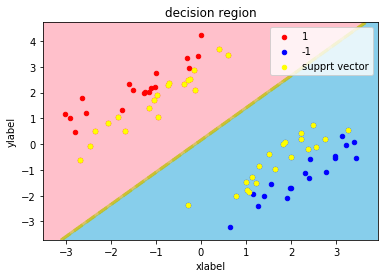

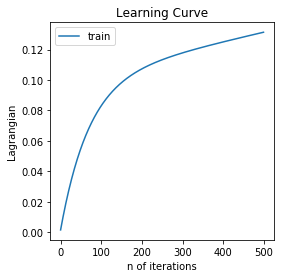

In [10]:
import time
#Linear kernel (for文でkernel関数を呼び出して計算)
clf_ln = ScratchSVMClassifier(num_iter=500, lr = 2*10**(-5), lmbd_threshold = 3*10**(-3), kernel='linear')

#開始時間
t0 = time.time()
clf_ln.fit(X_train, y_train, X_test, y_test)
pred = clf_ln.predict(X_test)
lap = time.time()
print("fit, predictまでの時間", lap - t0, " sec")
print("actual: ", y_test)
print("predict: ", pred)
print("Correct/Wrong: ", pred == y_test)

clf_ln.decision_region(X_train, y_train)
clf_ln.plot_learning_curve()

In [15]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

#predictの評価の表示
def show_evaluation(y_test, pred):
    print("----------------------------------------")
    print("Accuracy: ", accuracy_score(y_test, pred))
    print("Precision: ", precision_score(y_test, pred))
    print("Recall: ", recall_score(y_test, pred))
    print("f1 : ", f1_score(y_test, pred))
    print("----------------------------------------")

In [19]:
show_evaluation(y_test, pred.reshape(-1,))

----------------------------------------
Accuracy:  1.0
Precision:  1.0
Recall:  1.0
f1 :  1.0
----------------------------------------


fit, predictまでの時間 0.025378942489624023  sec
actual:  [ 1 -1 -1 -1  1  1 -1  1  1 -1  1 -1  1  1  1  1 -1  1  1 -1  1 -1 -1 -1
 -1]
predict:  [[ 1 -1 -1 -1  1  1 -1  1  1 -1  1 -1  1  1  1  1 -1  1  1 -1  1 -1 -1 -1
  -1]]
Correct/Wrong:  [[ True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True]]


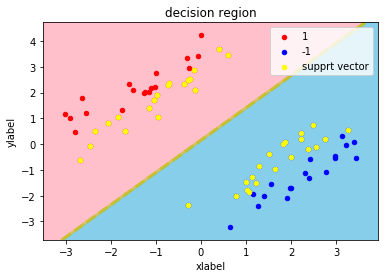

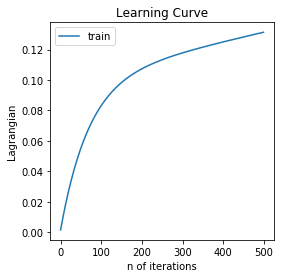

In [20]:
import time

# Linear kernel(linearのkernel関数に関して、行列計算で実装)
clf_ln_matrix = ScratchSVMClassifier_linear(num_iter=500, lr = 2*10**(-5), lmbd_threshold = 3*10**(-3))

#開始時間
t0 = time.time()
clf_ln_matrix.fit(X_train, y_train, X_test, y_test)
pred = clf_ln_matrix.predict(X_test)
lap = time.time()
print("fit, predictまでの時間", lap - t0, " sec")
print("actual: ", y_test)
print("predict: ", pred)
print("Correct/Wrong: ", pred == y_test)

clf_ln_matrix.decision_region(X_train, y_train)
clf_ln_matrix.plot_learning_curve()

fit, predictまでの時間 66.19136714935303  sec
actual:  [ 1 -1 -1 -1  1  1 -1  1  1 -1  1 -1  1  1  1  1 -1  1  1 -1  1 -1 -1 -1
 -1]
predict:  [[ 1 -1 -1 -1  1  1 -1  1  1 -1  1 -1  1  1  1  1 -1  1  1 -1  1 -1 -1 -1
  -1]]
Correct/Wrong:  [[ True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True]]


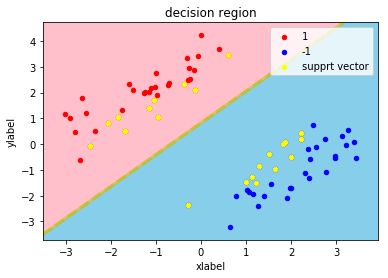

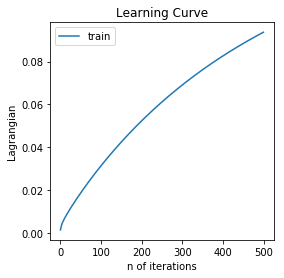

In [21]:
import time
#Polynomial kernel

clf_pl = ScratchSVMClassifier(num_iter=500, lr = 2*10**(-5), lmbd_threshold = 3*10**(-3), kernel='rbf', kernel_params=[1, 1, 3] )

#開始時間
t0 = time.time()
clf_pl.fit(X_train, y_train, X_test, y_test)
pred = clf_pl.predict(X_test)
lap = time.time()
print("fit, predictまでの時間", lap - t0, " sec")
print("actual: ", y_test)
print("predict: ", pred)
print("Correct/Wrong: ", pred == y_test)
clf_pl.decision_region(X_train, y_train)
clf_pl.plot_learning_curve()

In [191]:
#sklearnと比較
from sklearn.svm import SVC

clf = SVC()

#開始時間
t0 = time.time()
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
lap = time.time()
print("fit, predictまでの時間", lap - t0, " sec")

print("actual: ", y_test)
print("predict: ", pred)
print("Correct/Wrong: ", pred == y_test)

fit, predictまでの時間 0.006242990493774414  sec
actual:  [ 1 -1 -1 -1  1  1 -1  1  1 -1  1 -1  1  1  1  1 -1  1  1 -1  1 -1 -1 -1
 -1]
predict:  [ 1 -1 -1 -1  1  1 -1  1  1 -1  1 -1  1  1  1  1 -1  1  1 -1  1 -1 -1 -1
 -1]
Correct/Wrong:  [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True]


/Users/ohmori/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


linearはkernel関数使わないと10^3オーダーで早くなった。